In [1]:
%matplotlib inline 


import numpy as np #To use functions or constants that are in the NumPy module, type np.function_name. EG: np.pi is pi
import numpy.random as nprd #This imports random number generation functions
import scipy as sp #SciPy has lots of useful numerical methods, so we don't have to write them
import scipy.linalg as spla #This imports the sub-module containing linear algebra methods
import matplotlib.pyplot as plt #This will let us display images nicely
import cv2
#import pandas as pd 
from scipy import ndimage


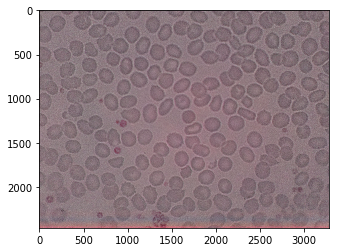

In [2]:
img = cv2.imread('X:\\Physics\\ResearchProjects\\RWBowman\\RC-PH1201\\Malaria_Diagnostic_Microscopy\\Project\\SAMBa Reading Project MDuff\\Malaria-Imaging-Code\\Full Images\\1_8.jpg')
plt.imshow(img)
plt.show()

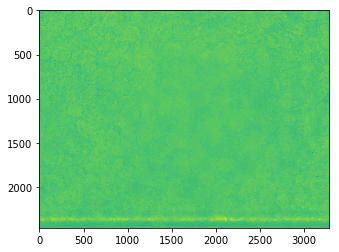

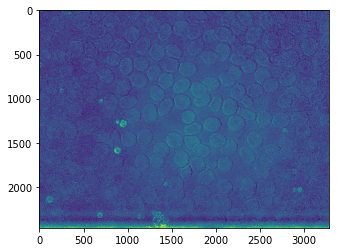

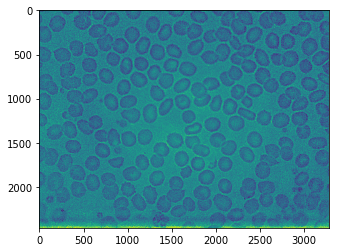

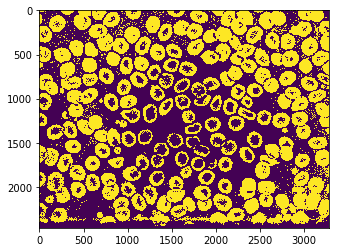

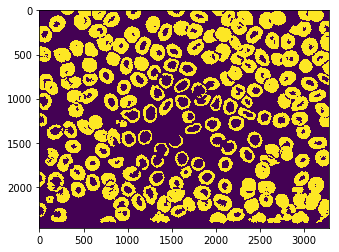

In [3]:
def small_thing_removal(img,min_area):
    label_img, cc_num = ndimage.label(img)
    CC = ndimage.find_objects(img)
    cc_areas = ndimage.sum(img, label_img, range(cc_num+1))
    area_mask = (cc_areas < min_area)
    img[area_mask[label_img]] = 0
    return(np.uint8(img))
    
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0)
    box = cv2.boxPoints(rect)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop



## Convert to HSV colour space 
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_h=img_hsv[:,:,0]
img_s=img_hsv[:,:,1]
img_v=img_hsv[:,:,2]

plt.imshow(img_h)
plt.show()
plt.imshow(img_s)
plt.show()
plt.imshow(img_v)
plt.show()

blur = cv2.GaussianBlur(img_v,(3,3),0)
ret_v,th_v = cv2.threshold(255-blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_v)
plt.show()

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
opening_v = cv2.morphologyEx(th_v, cv2.MORPH_OPEN, kernel1)
opening_v=small_thing_removal(opening_v,5000*255)
kernel2= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
closing_v = cv2.morphologyEx(opening_v, cv2.MORPH_CLOSE, kernel1)
plt.imshow(closing_v)
plt.show()


In [4]:
def hough(img): #Hough circle transform 
   
    try:
     
        img = cv2.medianBlur(img,7)
        circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=30,param2=15,minRadius=60,maxRadius=90)
        store=np.zeros(np.shape(circles[0,:])[0])+1
        for n in range(np.shape(store)[0]):
            i=circles[0,n]
            for j in range(n):
                if store[j]==1:
                    other=circles[0,j]
                    if (other[0]-i[0])**2+(other[1]-i[1])**2 < 100**2:
                        store[n]=0
        #                 print(other[0],i[0])
        #                 print(other[1],i[1])
        #                 print((other[0]-i[0]),(other[1]-i[1]) )
        #                 print((other[0]-i[0])**2,(other[1]-i[1])**2 )



        store=np.array(store, dtype=np.bool)
        circles2=circles[0,:]
        circles2= circles2[store,:]
        circles2 = np.uint16(np.around(circles2))


        return(circles2)
    except Exception:# NEED TO SORT THIS!!!!!!!!!!!!!!!!
        return()

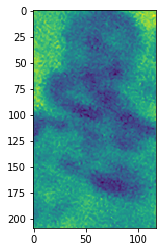

C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


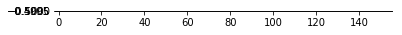

C:\Users\magd21\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


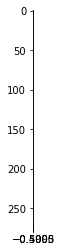

In [ ]:
pictures = {}
number=0
contours = cv2.findContours(closing_v, 1, 2)
for i in range(np.shape(contours[1])[0]):
    cnt = contours[1][i]
    x,y,w,h = cv2.boundingRect(cnt)

    area=cv2.contourArea(cnt)
    

 
    if 25000>area>12000:
        ellipse = cv2.fitEllipse(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
        img_new=crop_minAreaRect(img_v, ellipse)  #  cv2.imwrite ('H:\\dos\\Reading Courses\\Malaria Imaging\\cropped_images\\0_1_crop'+str(i)+'.tiff',  img_new)
        pictures[number] = img_new
        number=number+1
        plt.imshow(img_new)
        plt.show()
        cv2.imwrite ('X:\\Physics\\ResearchProjects\\RWBowman\\RC-PH1201\\Malaria_Diagnostic_Microscopy\\Project\\SAMBa Reading Project MDuff\\Malaria-Imaging-Code\\Cropped, Rotated\\1_8_crop'+str(i)+'.tiff',  img_new)
#     elif area>25000:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),10)
#         #print(x,y)
#         img_new=crop_minAreaRect(img_v, ellipse)
#         #cv2.imwrite ('H:\\dos\\Reading Courses\\Malaria Imaging\\cropped_images\\0_1_crop'+str(i)+'.tiff',  img_new)
#         #print(img_new)
#         circles =hough(img_new)
#         #print(circles)
#         for j in range(np.shape(circles)[0]):
#             x1=circles[j,0]-circles[j,2]
#             y1=circles[j,1]-circles[j,2]
#             h1=circles[j,2]*2
#             w1=circles[j,2]*2
#             #cv2.rectangle(img_new,np.array([int(x1),int(y1)]),np.array([int(x1+w),int(y1+h)]),255,10)
#             cv2.rectangle(img,(int(x+x1),int(y+y1)),(int(x+x1+w1),int(y+y1+h1)),(255,0,0),10)
#             img1=img_v[int(y+y1)-10:int(y+y1+h1)+10,int(x+x1)-10:int(x+x1+w1)+10]
#             #print('here', img1)
#             pictures[number] = img1
#             number=number+1

#         plt.imshow(img_new)
#         plt.show()


plt.imshow(img,aspect='auto')
plt.show()
#cv2.imwrite('H:\\dos\Reading Courses\\Malaria Imaging\\Example2.tiff',img)

In [ ]:
pictures